# Ultrametric benchmark for continual learning - Hyperparameter sweeps 
# (T, LR, minibatch_size) on artificial depth 4

In this notebook we analyze the impact of three hyperparameters on the classification score as a function of time:
- T, the temperature
- LR, the learning rate
- BS, the size of minibatch
<br><br>
All simulations are run on an artificial dataset generated from an ultrametric tree with depth 4.
<br><br>
The default parameters are:
- T=0.4
- LR=0.001
- BS=10
<br><br>
Let's load our framework and set some global variables:

In [7]:
%matplotlib inline

import os, sys, ast, pdb
sys.path.append('../')

import pickle
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib.colors import hsv_to_rgb

import utils
paths = utils.get_project_paths()

import make_figures as mf
import result_loader as ld
utils.format_paper()

linear_ratio_for_artificial_seq = 20
artificial_seq_len = 200

Now let's read the dictionary mapping file location to result set:

In [8]:
## LOADING MAPPER FILE ##
with open(paths['simus'] /'simu_mapping_compact.txt', 'r', encoding='utf-8') as filenames:
    filenames_dct_txt = filenames.read().replace('\n', '')
    
sim_directory = ast.literal_eval(filenames_dct_txt)

Let's create a small function to plot classification score across hyperparameter values:

In [9]:
def make_perfplot_paramsweep(rs_dict, hyperparam_name, n_ticks=10):
    fig = plt.figure(figsize=(18,12))
    acc_ax = fig.add_subplot(1, 1, 1)
    
    for hyperparam, rs in rs_dict.items():
        xtick_scale = rs.n_tests//n_ticks
        xtick_pos = xtick_scale*np.arange((rs.n_tests//xtick_scale)+1)
        xtick_labels = int(rs.seq_length/((rs.n_tests//xtick_scale)))*np.arange((rs.n_tests//xtick_scale)+1)
    
        ld.make_perfplot(rs, blocks=[], ax=acc_ax, plt_confinter=False, draw_timescales=False, draw_explorations=False, hyper_param=hyperparam)

        ld.format_perf_plot(ax=acc_ax, title="Accuracy as a function of time across {0:s}".format(hyperparam_name), legend_title=rs.descr,
            xtick_pos=xtick_pos, xtick_labels=xtick_labels, plot_window=None)

## 1) Temperature sweep

In [10]:
T_sweep = {}
T_grid = [0.28, 0.31, 0.34, 0.37, 0.4, 0.43, 0.46, 0.49, 0.52]

for T_id, T in enumerate(T_grid):
    T_sweep[T] = ld.ResultSet(
        rs_name="T_sweep_{0:.2f}".format(T),
        rs_descr="Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)".format(T),
        sim_map_dict = sim_directory,
        dataset_name = 'artificial_16',
        nn_config = 'FCL10_celu_temperature_sweep',
        seq_type = 'T_{0:.3f}'.format(T),
        simset_id = T,
        seq_length = 240000,
        hue = 0.3
    )
    T_sweep[T].load_analytics()
    T_sweep[T].hsv_orig = [0.3, 1-0.7*(T_id/(len(T_grid)-1)), 0.2+0.7*(T_id/(len(T_grid)-1))]

Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with LR=0.001, celu nonlinearity)...


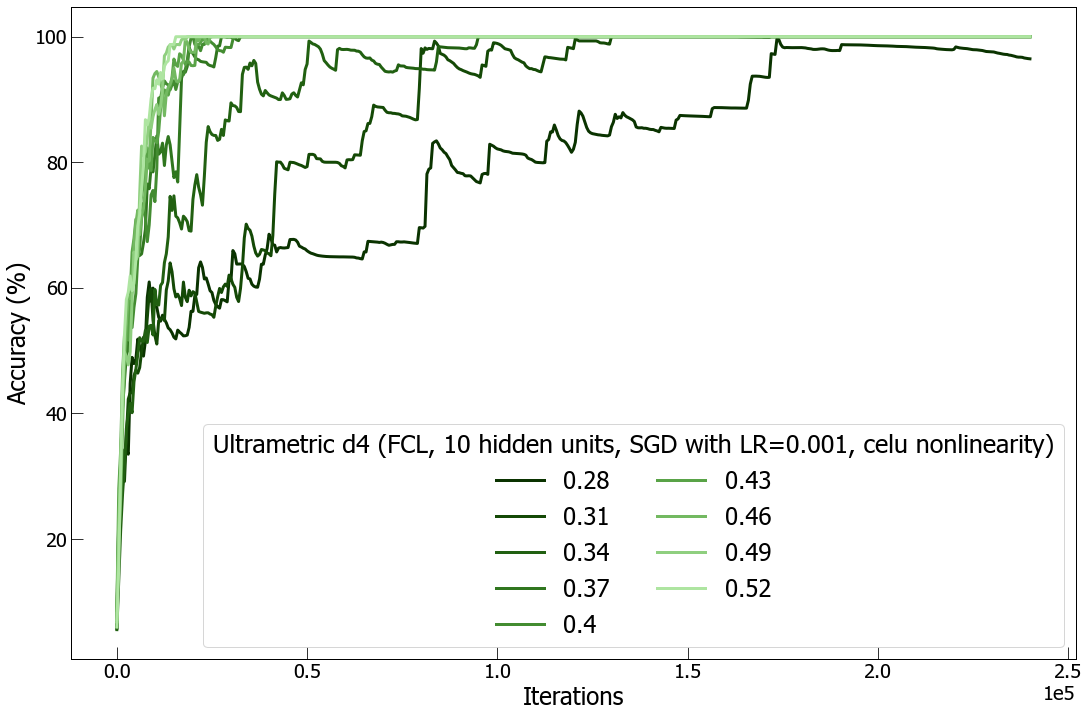

In [11]:
make_perfplot_paramsweep(T_sweep, "temperature")

## 2) Learning Rate sweep

In [12]:
LR_sweep = {}
LR_grid = [0.001, 0.005, 0.01, 0.05, 0.1, 0.0005]

for LR_id, LR in enumerate(LR_grid):
    LR_sweep[LR] = ld.ResultSet(
        rs_name="LR_sweep_{0}".format(LR),
        rs_descr="Ultrametric d4 (FCL, 10 hidden units, SGD with T=0.4, celu nonlinearity)".format(LR),
        sim_map_dict = sim_directory,
        dataset_name = 'artificial_16',
        nn_config = 'FCL10_celu_LR_sweep',
        seq_type = 'LR_{0}'.format(LR),
        simset_id = 0.4,
        seq_length = 240000,
        hue = 0.3
    )
    LR_sweep[LR].load_analytics()
    LR_sweep[LR].hsv_orig = [0.3, 1-0.7*(LR_id/(len(LR_grid)-1)), 0.2+0.7*(LR_id/(len(LR_grid)-1))]

Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with T=0.4, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with T=0.4, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with T=0.4, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with T=0.4, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with T=0.4, celu nonlinearity)...
Loading result set for Ultrametric d4 (FCL, 10 hidden units, SGD with T=0.4, celu nonlinearity)...


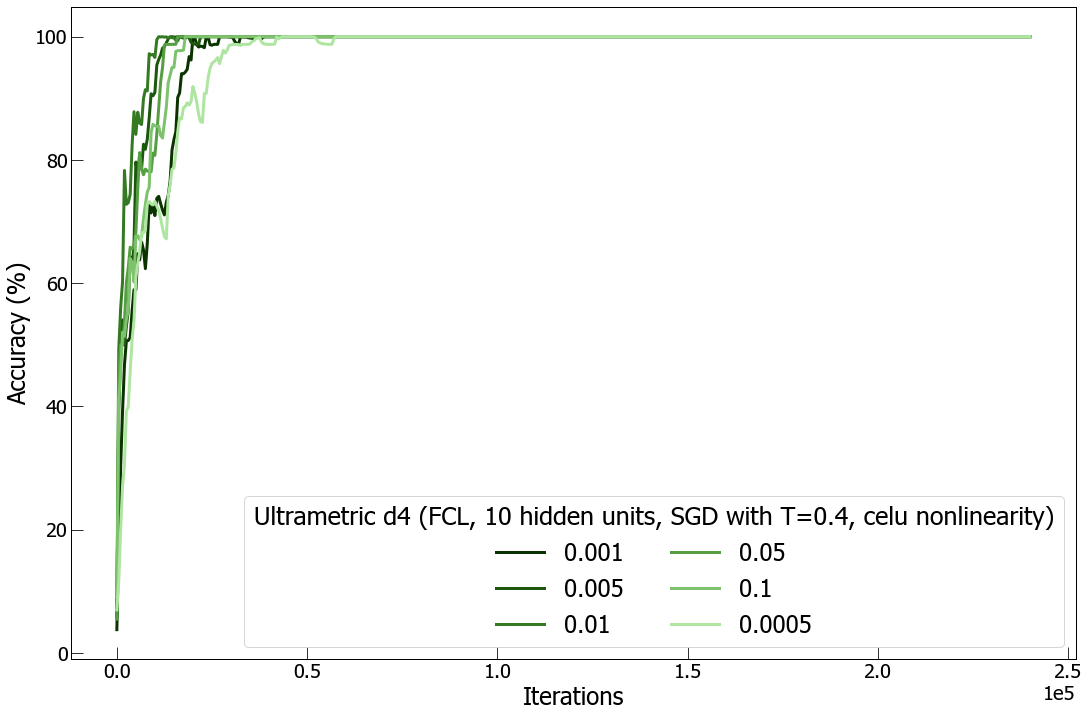

In [13]:
make_perfplot_paramsweep(LR_sweep, "learning rate")

## 3) Minibatches

In [14]:
BS_sweep = {}
BS_grid = [10, 50, 100, 500, 1000]

for BS_id, BS in enumerate(BS_grid):
    BS_sweep[BS] = ld.ResultSet(
        rs_name=f"MB_sweep_{BS}",
        rs_descr=f"Minibatches d4 (FLC, 10 hidden units, SGD T=0.4, celu nonlinearity",
        sim_map_dict = sim_directory, 
        dataset_name = 'artificial_16', 
        nn_config = "FCL10_celu_minibatch_sweep",
        seq_type = f'BS_{BS}', 
        simset_id = 0.4, 
        seq_length = 240000,
        hue = 0.3
    )
    BS_sweep[BS].load_analytics()
    BS_sweep[BS].hsv_orig = [0.3, 1-0.7*(BS_id/(len(BS_grid)-1)), 0.2+0.7*(BS_id/(len(BS_grid)-1))]

Loading result set for Minibatches d4 (FLC, 10 hidden units, SGD T=0.4, celu nonlinearity...
Loading result set for Minibatches d4 (FLC, 10 hidden units, SGD T=0.4, celu nonlinearity...
Loading result set for Minibatches d4 (FLC, 10 hidden units, SGD T=0.4, celu nonlinearity...
Loading result set for Minibatches d4 (FLC, 10 hidden units, SGD T=0.4, celu nonlinearity...
Loading result set for Minibatches d4 (FLC, 10 hidden units, SGD T=0.4, celu nonlinearity...


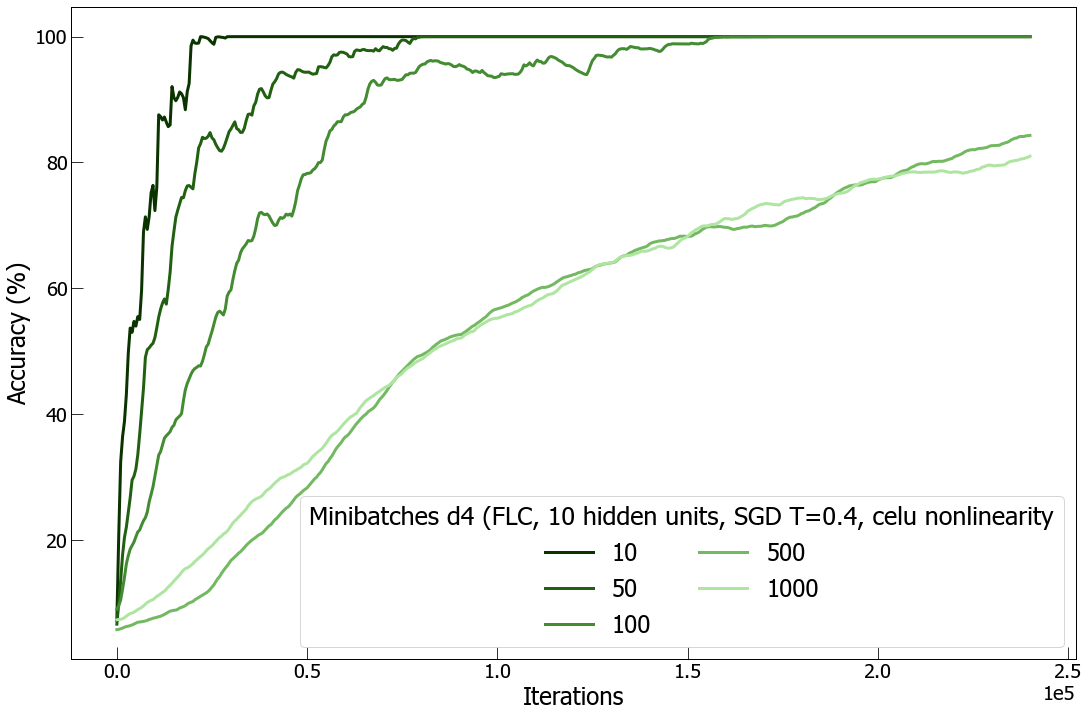

In [15]:
make_perfplot_paramsweep(BS_sweep, "minibatch size")